In [72]:
import pandas as pd

In [149]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [74]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [75]:
import seaborn as sns
sns.set_style('whitegrid')

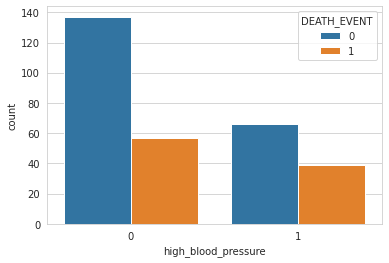

In [278]:
sns.countplot(x='high_blood_pressure',data=df, hue = 'DEATH_EVENT')

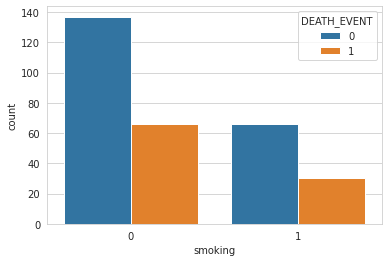

In [103]:
sns.countplot(x='smoking',data=df, hue = 'DEATH_EVENT')

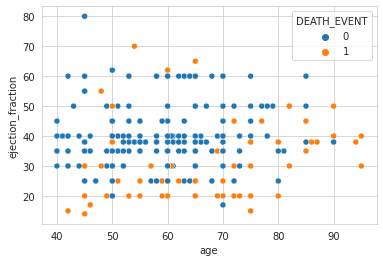

In [206]:
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT',data=df)

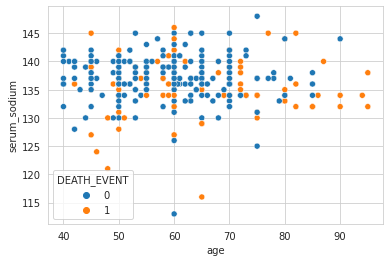

In [207]:
sns.scatterplot(x='age', y='serum_sodium', hue='DEATH_EVENT',data=df)

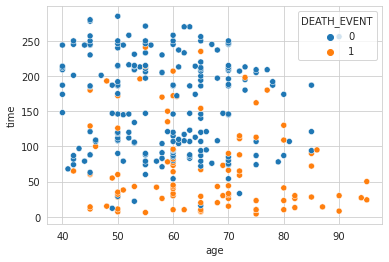

In [208]:
sns.scatterplot(x='age', y='time', hue='DEATH_EVENT',data=df)

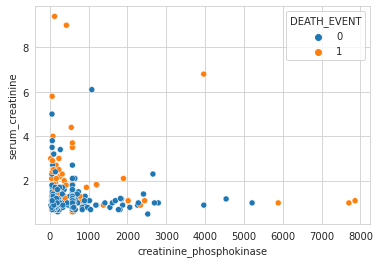

In [295]:
sns.scatterplot(x='creatinine_phosphokinase', y='serum_creatinine', hue='DEATH_EVENT',data=df)

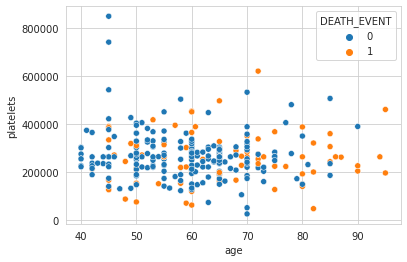

In [296]:
sns.scatterplot(x='age', y='platelets', hue='DEATH_EVENT',data=df)

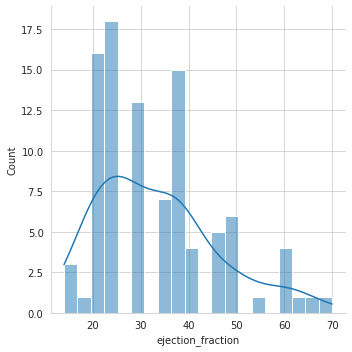

In [297]:
sns.displot(data=df.where(df['DEATH_EVENT']==1), x='ejection_fraction',kde=True,bins=20)

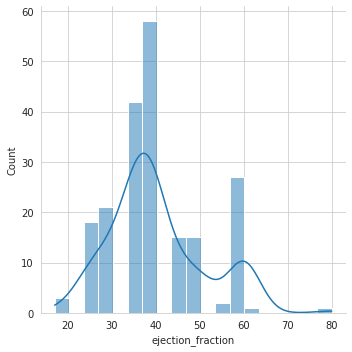

In [298]:
sns.displot(data=df.where(df['DEATH_EVENT']==0), x='ejection_fraction',kde=True)

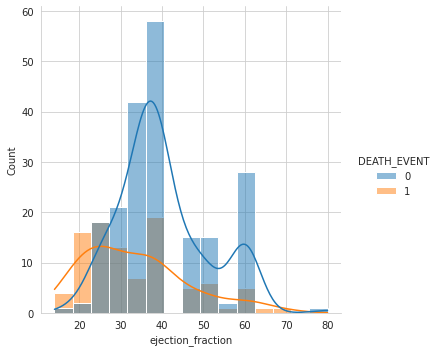

In [299]:
sns.displot(data=df, x='ejection_fraction',kde=True, hue='DEATH_EVENT')

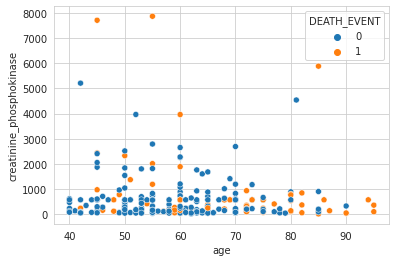

In [300]:
sns.scatterplot(x='age', y='creatinine_phosphokinase', hue='DEATH_EVENT',data=df)

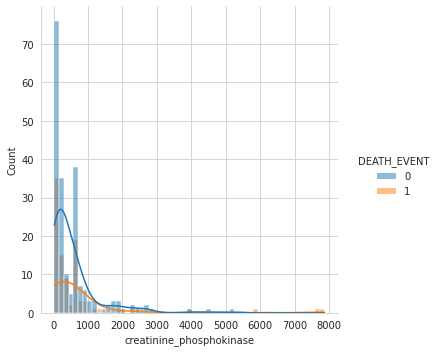

In [301]:
sns.displot(data=df, x='creatinine_phosphokinase',kde=True, hue='DEATH_EVENT')

In [401]:
from sklearn.model_selection import train_test_split

In [441]:
drop_columns = ['DEATH_EVENT', 'smoking']
X_train, X_test, y_train, y_test = train_test_split(df.drop(drop_columns, axis=1), 
                                                    df['DEATH_EVENT'], 
                                                    test_size=0.30, 
                                                    random_state=1
                                                   )

In [442]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [443]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,126


In [444]:
predictions = model.predict(X_test)

In [445]:
from sklearn.metrics import confusion_matrix

In [446]:
accuracy=confusion_matrix(y_test, predictions)#predictions)
accuracy

array([[62,  2],
       [ 8, 18]])

In [447]:
from sklearn.metrics import accuracy_score

In [448]:
accuracy=accuracy_score(y_test, predictions)
accuracy

0.8888888888888888

In [449]:
from xgboost import XGBClassifier

In [450]:
model = XGBClassifier(max_depth=8)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [451]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [452]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9111111111111111